In [267]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("admission_predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


<AxesSubplot:>

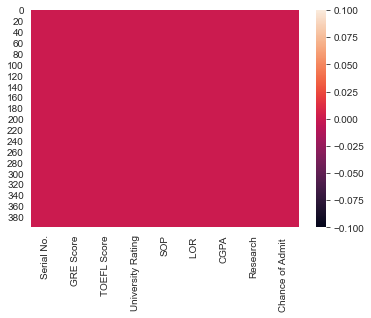

In [268]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Research', ylabel='count'>

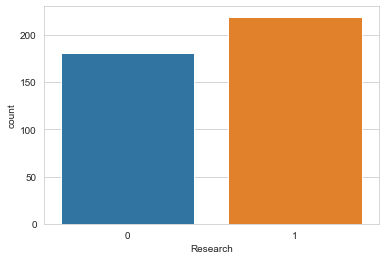

In [269]:
sns.countplot(data= data, x = "Research")

In [270]:
def y_mod(cols):
    col = cols
    
    if col >= 0.7:
        return 1
    
    else:
        return 0

In [271]:
data["Chance of Admit "] = data["Chance of Admit "].apply(y_mod)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,0


<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

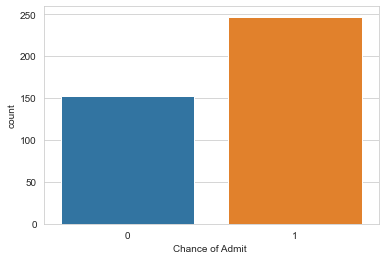

In [272]:
sns.countplot(data = data, x = "Chance of Admit ")

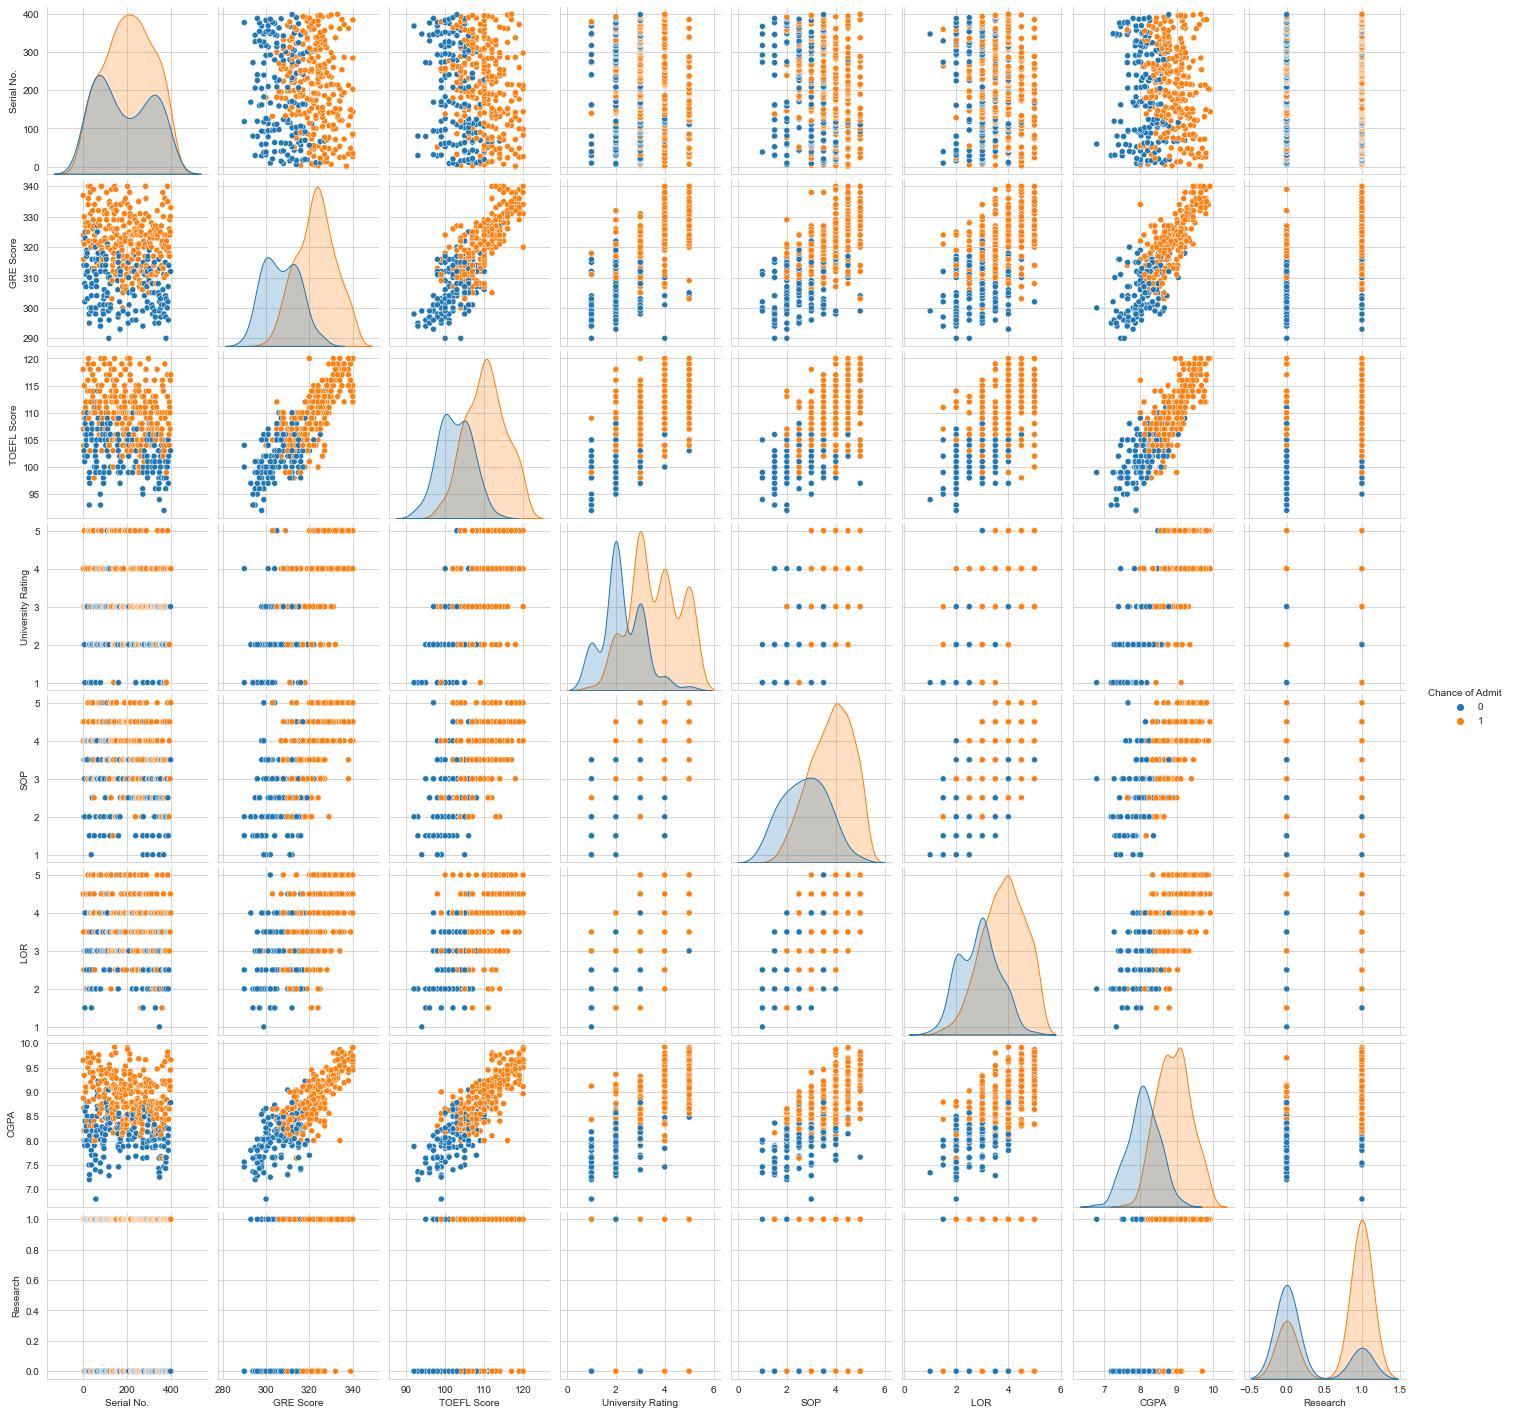

In [273]:
sns.pairplot(data = data, hue = "Chance of Admit ")

In [274]:
data_x = data.drop(labels= ["Chance of Admit "], axis = 1)
data_y = data["Chance of Admit "]

In [275]:
from sklearn.model_selection import train_test_split
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size= 0.2)

In [276]:
from sklearn.tree import DecisionTreeClassifier
dct_model = DecisionTreeClassifier()
dct_model.fit(data_x_train, data_y_train)
dct_y_pred = dct_model.predict(data_x_test)
dct_y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [277]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(data_y_test, dct_y_pred))

[[24  6]
 [ 7 43]]


In [278]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data_y_test, dct_y_pred))

0.8375


<AxesSubplot:ylabel='count'>

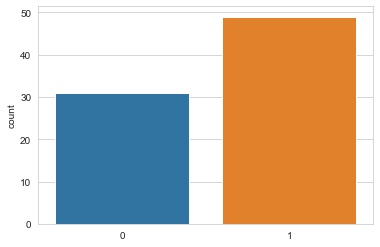

In [279]:
sns.set_style("whitegrid")
sns.countplot(x = dct_y_pred)

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

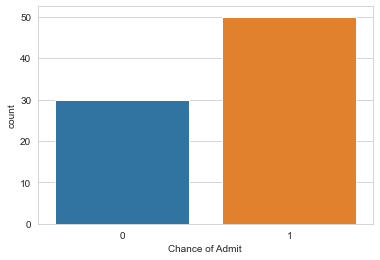

In [280]:
sns.countplot(x = data_y_test)

In [281]:
'''
Lets try Support Vector Machines
'''
from sklearn.svm import SVC
svc_model = SVC(kernel= "linear")
svc_model.fit(data_x_train, data_y_train)
svc_y_pred = svc_model.predict(data_x_test)
svc_y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [282]:
print(confusion_matrix(data_y_test, svc_y_pred))

[[26  4]
 [ 9 41]]


In [283]:
print(accuracy_score(data_y_test, svc_y_pred))

0.8375


<AxesSubplot:ylabel='count'>

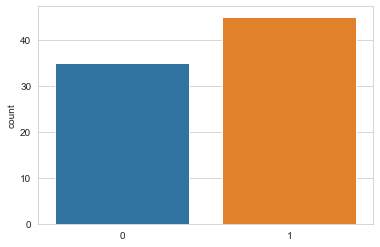

In [284]:
sns.countplot(x = svc_y_pred)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

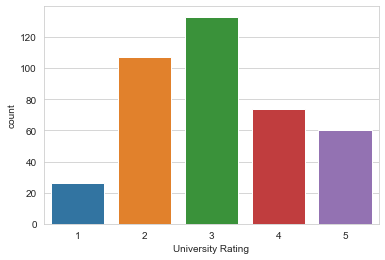

In [285]:
sns.countplot(data = data, x = "University Rating")